In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame(yf.download("^GSPC", start= '2020-01-01')['Adj Close'])
df['returns'] = df.pct_change()
df

[*********************100%%**********************]  1 of 1 completed


,Adj Close,returns
Date,,
2020-01-02,3257.850098,NaN
2020-01-03,3234.850098,-0.007060
2020-01-06,3246.280029,0.003533
2020-01-07,3237.179932,-0.002803
2020-01-08,3253.050049,0.004902
...,...,...
2024-07-24,5427.129883,-0.023149
2024-07-25,5399.220215,-0.005143
2024-07-26,5459.100098,0.011090


In [3]:
def lagged_returns(df, n):
    l = []
    for i in range (1,n+1):
            df[f'Lag{i}'] = df['returns'].shift(i)
            l.append(f'Lag{i}')
    return df, l

In [4]:
df, l = lagged_returns(df,2)

In [5]:
df['Direction'] = np.where(df['returns'] > 0,1,0)
df.dropna(inplace= True)
df

,Adj Close,returns,Lag1,Lag2,Direction
Date,,,,,
2020-01-07,3237.179932,-0.002803,0.003533,-0.007060,0
2020-01-08,3253.050049,0.004902,-0.002803,0.003533,1
2020-01-09,3274.699951,0.006655,0.004902,-0.002803,1
2020-01-10,3265.350098,-0.002855,0.006655,0.004902,0
2020-01-13,3288.129883,0.006976,-0.002855,0.006655,1
...,...,...,...,...,...
2024-07-24,5427.129883,-0.023149,-0.001558,0.010792,0
2024-07-25,5399.220215,-0.005143,-0.023149,-0.001558,0
2024-07-26,5459.100098,0.011090,-0.005143,-0.023149,1


In [6]:
df['Direction'].value_counts()

Direction
1    613
0    535
Name: count, dtype: int64

In [7]:
x, y = df[l], df['Direction']

In [8]:
### Over Fitted Model
model = LogisticRegression(class_weight='balanced')
model.fit(x,y)

LogisticRegression(class_weight='balanced')

In [9]:
df['prediction'] = model.predict(x)
df

,Adj Close,returns,Lag1,Lag2,Direction,prediction
Date,,,,,,
2020-01-07,3237.179932,-0.002803,0.003533,-0.007060,0,0
2020-01-08,3253.050049,0.004902,-0.002803,0.003533,1,1
2020-01-09,3274.699951,0.006655,0.004902,-0.002803,1,0
2020-01-10,3265.350098,-0.002855,0.006655,0.004902,0,0
2020-01-13,3288.129883,0.006976,-0.002855,0.006655,1,1
...,...,...,...,...,...,...
2024-07-24,5427.129883,-0.023149,-0.001558,0.010792,0,1
2024-07-25,5399.220215,-0.005143,-0.023149,-0.001558,0,1
2024-07-26,5459.100098,0.011090,-0.005143,-0.023149,1,0


<Axes: xlabel='Date'>

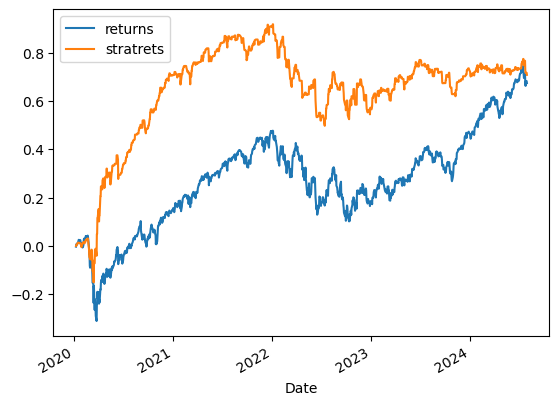

In [10]:
df['stratrets'] = df['returns'] * df['prediction']
((df[['returns','stratrets']]+1).cumprod()-1).plot()

In [11]:
(df[['returns','stratrets']]+1).cumprod()-1

,returns,stratrets
Date,,
2020-01-07,-0.002803,0.000000
2020-01-08,0.002085,0.004902
2020-01-09,0.008755,0.004902
2020-01-10,0.005874,0.004902
2020-01-13,0.012892,0.011913
...,...,...
2024-07-24,0.671800,0.726277
2024-07-25,0.663202,0.717400
2024-07-26,0.681648,0.717400


In [12]:
### Testing using train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, shuffle= False)

In [13]:
### Sample Model
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [14]:
x_test

,Lag1,Lag2
Date,,
2023-03-16,-0.006981,0.016477
2023-03-17,0.017562,-0.006981
2023-03-20,-0.011019,0.017562
2023-03-21,0.008918,-0.011019
2023-03-22,0.012982,0.008918
...,...,...
2024-07-24,-0.001558,0.010792
2024-07-25,-0.023149,-0.001558
2024-07-26,-0.005143,-0.023149


In [15]:
x_test['Predict'] = model.predict(x_test)
x_test['rets'] = df['returns'][x_test.index[0]:]





<Axes: xlabel='Date'>

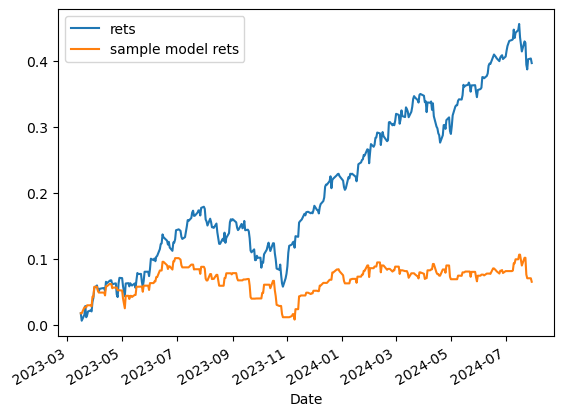

In [17]:
x_test['sample model rets'] = x_test['rets'] * x_test['Predict']
((x_test[['rets','sample model rets']]+1).cumprod()-1).plot()